#### Background and Context



- AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

- A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

- You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.



#### Objective


- To predict whether a liability customer will buy a personal loan or not. 
- Which variables are most significant.
- Which segment of customers should be targeted more.
- Project Dataset: Loan_Modelling.csv



#### Data Dictionary


* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?




#### Best Practices for Notebook : 


#### Import the basic libraries and load the data set

In [1]:
!pip install imblearn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

In [3]:
# Import the basic python libraries
import csv
import numpy as np # for numerical computing
import pandas as pd # for loading the data set and carrying out vital analysis
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import roc_auc_score
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix





In [4]:
loan_df = pd.read_csv('Loan_Modelling.csv')

#### Exploring through the data

In [5]:
loan_df.head(100)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,38,12,48,95617,4,0.2,3,0,0,0,0,1,0
96,97,41,15,80,95014,1,5.2,1,0,0,0,0,0,0
97,98,54,28,161,92121,1,2.9,1,0,0,0,0,1,0
98,99,49,23,94,92374,1,0.3,1,0,0,0,0,1,0


In [6]:
loan_df.tail(100)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4900,4901,26,1,74,90028,4,2.2,1,0,0,0,0,1,0
4901,4902,26,0,54,96094,3,1.1,2,0,0,0,0,1,0
4902,4903,33,8,58,90505,2,2.5,1,0,0,0,0,1,0
4903,4904,40,15,18,94534,2,0.1,2,119,0,0,0,1,1
4904,4905,64,40,88,94305,1,3.8,1,243,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [7]:
loan_df.shape

(5000, 14)

In [8]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
loan_df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


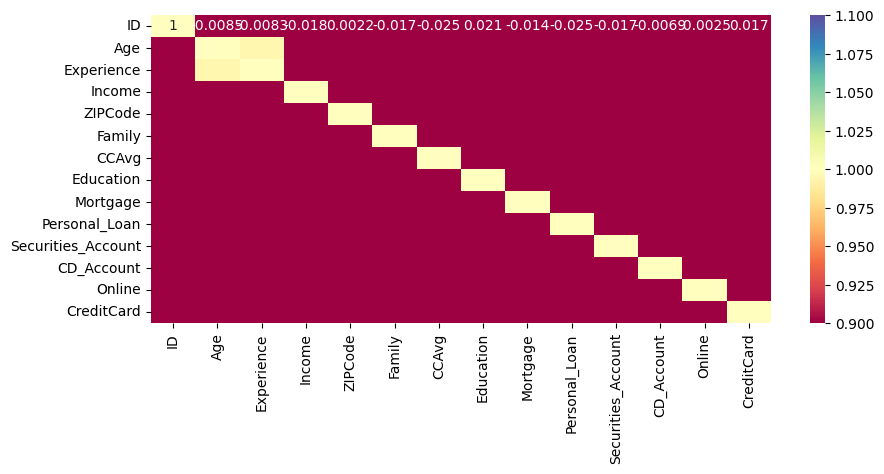

In [10]:

loan_df_corr = loan_df.select_dtypes(include = 'number').corr()
plt.figure(figsize = (10,4))
sns.heatmap(loan_df_corr, vmin = 1, vmax = 1, cmap = 'Spectral', annot = True);

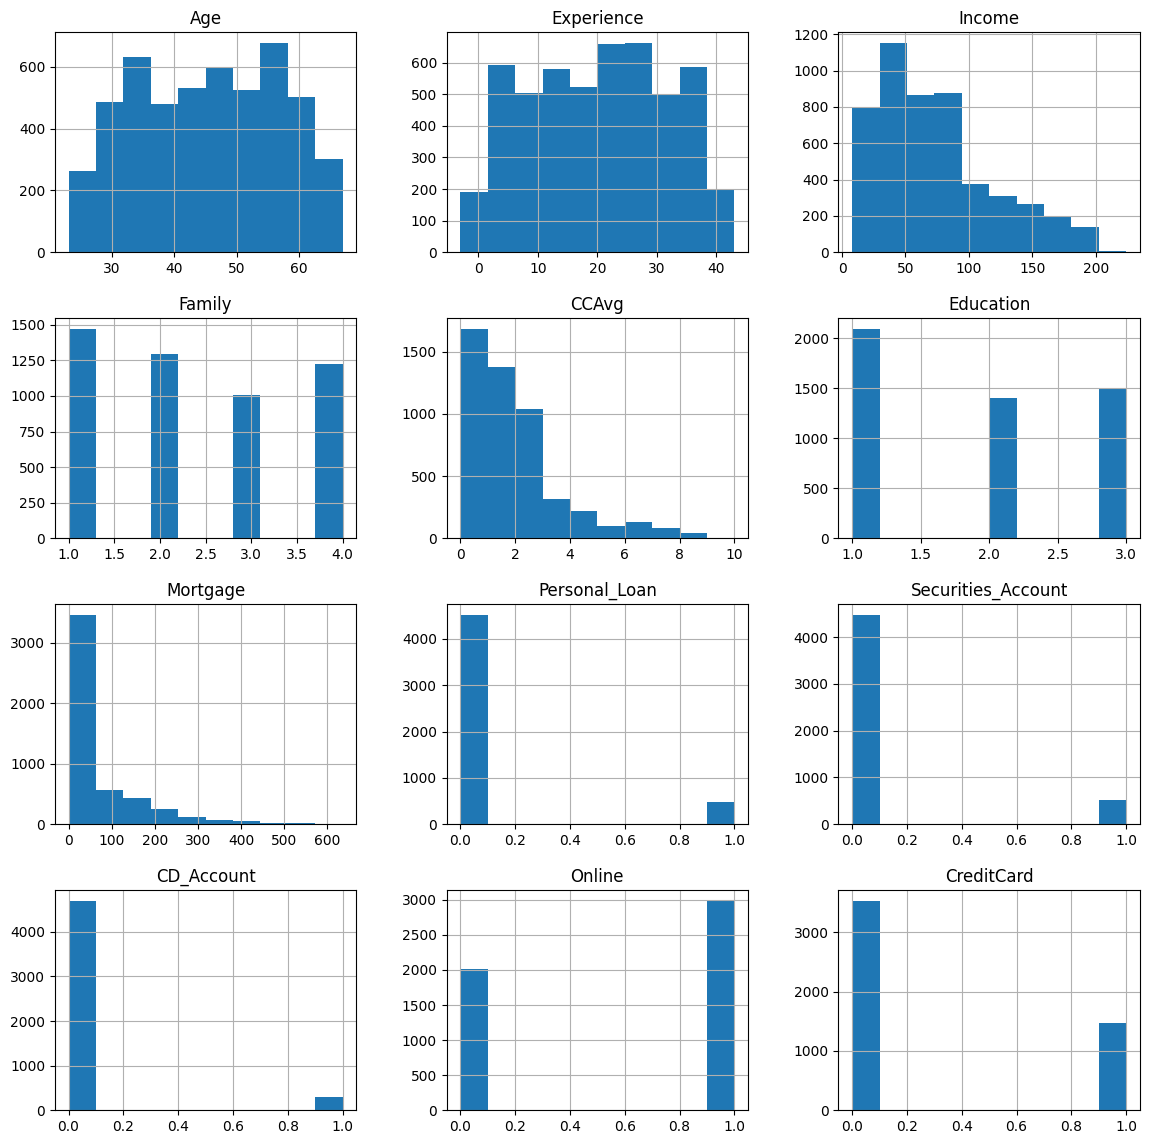

In [56]:
loan_df.hist(figsize = (14, 14))
plt.show()


- since we are not using a linear model, the symmetrical nature of the above plots would not be of much concern

In [58]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Create a labeled barplot for a categorical feature.

    Parameters:
    - data: DataFrame, the dataset containing the feature.
    - feature: str, the name of the categorical feature.
    - perc: bool, whether to show percentages on the y-axis (default is False).
    - n: int, the number of top categories to display (default is None, showing all).

    Returns:
    - None
    """

    # Count occurrences of each category
    counts = data[feature].value_counts()

    # Select the top 'n' categories if specified
    if n is not None:
        counts = counts.head(n)

    # Create a barplot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=counts.index, y=counts.values)

    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel("Count" if not perc else "Percentage")
    plt.title(f"{feature} Distribution")

    # Show percentages on the y-axis if specified
    if perc:
        total = len(data)
        for p in ax.patches:
            percentage = f"{100 * p.get_height() / total:.2f}%"
            x = p.get_x() + p.get_width() / 2 - 0.1
            y = p.get_height() + 0.01
            ax.annotate(percentage, (x, y), ha='center')

    plt.show()


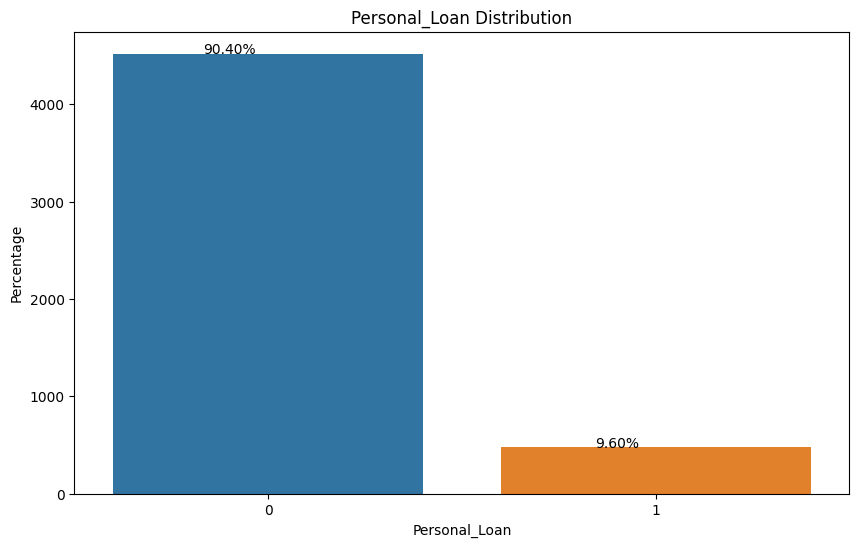

In [57]:
labeled_barplot(data = loan_df, feature = 'Personal_Loan', perc = True)

In [11]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [12]:
loan_df['Personal_Loan'].value_counts(normalize = True)

Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

##### select feutures and target

In [13]:
# select feutures and target
x = loan_df.drop('Personal_Loan', axis = 1)
y = loan_df['Personal_Loan']

In [14]:
# drop unneccessary column
loan_df.drop(['ID','ZIPCode'],  axis = 1, inplace = True)

#### spliting of the dataset

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0, stratify = y)

In [16]:
x_train

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
3789,3790,51,27,24,94301,3,0.4,1,0,0,0,1,1
758,759,64,39,35,90266,1,1.5,2,0,1,0,0,0
2868,2869,52,26,31,94923,4,1.8,1,0,0,0,1,1
2550,2551,32,8,20,93106,1,0.5,3,102,0,0,1,0
2150,2151,62,38,54,91320,1,0.8,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,3598,56,26,51,92028,3,2.0,3,0,0,0,1,0
4670,4671,52,26,194,94305,1,1.7,1,0,0,0,1,0
988,989,63,39,32,94998,1,1.9,2,100,0,0,0,0
2037,2038,35,8,52,95616,2,1.0,2,0,0,0,0,1


In [17]:
y_train

3789    0
758     0
2868    0
2550    0
2150    0
       ..
3597    0
4670    0
988     0
2037    0
2174    0
Name: Personal_Loan, Length: 3500, dtype: int64

In [18]:
x

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [19]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal_Loan, Length: 5000, dtype: int64

#### balanceing the distribution fo the target

In [20]:
# create an instance for the SMOTE
sm = SMOTE()

In [21]:
y_train.value_counts(normalize = True)

Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

In [22]:
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

In [23]:
x_train_sm

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,3790,51,27,24,94301,3,0.400000,1,0,0,0,1,1
1,759,64,39,35,90266,1,1.500000,2,0,1,0,0,0
2,2869,52,26,31,94923,4,1.800000,1,0,0,0,1,1
3,2551,32,8,20,93106,1,0.500000,3,102,0,0,1,0
4,2151,62,38,54,91320,1,0.800000,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6323,1669,48,23,167,94537,3,0.367806,1,0,0,1,1,0
6324,346,54,30,104,92085,1,3.707287,1,0,0,0,0,0
6325,585,43,17,169,91241,3,6.067217,3,0,0,0,1,0
6326,4554,50,24,123,90084,2,1.774856,2,0,0,0,0,0


In [24]:
y_train_sm

0       0
1       0
2       0
3       0
4       0
       ..
6323    1
6324    1
6325    1
6326    1
6327    1
Name: Personal_Loan, Length: 6328, dtype: int64

In [25]:
y_train_sm.value_counts(normalize = True)

Personal_Loan
0    0.5
1    0.5
Name: proportion, dtype: float64

In [26]:
x_train_sm.value_counts(normalize = True)

ID    Age  Experience  Income  ZIPCode  Family  CCAvg     Education  Mortgage  Securities_Account  CD_Account  Online  CreditCard
2     45   19          34      90089    3       1.500000  1          0         1                   0           0       0             0.000158
3300  45   19          143     94992    3       3.631684  2          0         0                   0           0       0             0.000158
3299  56   32          11      94110    2       0.300000  1          89        0                   0           0       0             0.000158
3297  63   37          132     94080    1       4.400000  2          0         0                   0           1       0             0.000158
3296  42   16          141     94960    3       4.000000  2          0         0                   0           0       0             0.000158
                                                                                                                                       ...   
1600  47   23     

In [29]:
x_test_sm, y_test_sm = sm.fit_resample(x_test, y_test)

In [30]:
x_test_sm

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,10,34,9,180,93023,1,8.900000,3,0,0,0,0,0
1,462,55,30,81,92123,2,3.700000,1,0,1,0,0,0
2,3701,48,22,128,94608,1,5.700000,1,0,1,0,0,0
3,1560,59,35,102,92677,4,3.000000,2,115,0,0,1,0
4,4559,44,19,82,95521,2,0.400000,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2707,375,42,17,159,93270,2,5.771057,2,0,0,0,0,0
2708,2914,45,19,155,90792,3,1.544615,1,300,0,0,0,0
2709,4569,39,14,170,94313,2,2.424360,1,464,0,0,0,0
2710,1884,55,29,111,93098,3,0.673566,1,349,1,1,1,0


In [31]:
y_test_sm

0       1
1       0
2       0
3       1
4       0
       ..
2707    1
2708    1
2709    1
2710    1
2711    1
Name: Personal_Loan, Length: 2712, dtype: int64

In [34]:
from collections import Counter

Counter(y_train_sm)



Counter({0: 3164, 1: 3164})

#### Weighing the importance and and effect of each feuture

In [36]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

# Access feature importances
feature_importances = dt_model.feature_importances_

In [37]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print(feature_importance_df)


               Feature  Importance
7            Education    0.405539
3               Income    0.297539
5               Family    0.161098
6                CCAvg    0.055121
2           Experience    0.021800
4              ZIPCode    0.016697
1                  Age    0.015892
10          CD_Account    0.015380
0                   ID    0.007017
11              Online    0.002744
8             Mortgage    0.001173
9   Securities_Account    0.000000
12          CreditCard    0.000000


- With a value of roughly 0.406, the "Education" feature has the highest priority according to the feature importances above. Consequently, "Education" is regarded as the most crucial component in making predictions or conclusions, according to this Decision Tree model.


- The relative contributions of each feature to the model's overall decision-making process are shown by the importance values. - With an approximate value of 0.298, "Income" is the second most significant factor in this instance, followed by "Family" with an approximate importance of 0.161.


- It is significant to remember that how feature importances are interpreted depends on the particular context of the dataset These numbers don't always indicate a cause and effect relationship, but they do reveal which features the model depends on more.

####  creating an instance of the Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

def create_decision_tree(random_state=0):
    """
    Create a Decision Tree Classifier.

    Parameters:
    - random_state (int): Random seed for reproducibility.

    Returns:
    - DecisionTreeClassifier: Initialized Decision Tree Classifier.
    """
    dtree = DecisionTreeClassifier(random_state=random_state)
    return dtree


In [39]:
dtree = create_decision_tree(random_state=0)

# Fit the model on the training data
dtree.fit(x_train, y_train)


DecisionTreeClassifier(random_state=0)

In [60]:
# Assuming you have a test dataset 'x_test'
predictions = dtree.predict(x_test)


In [59]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have true labels for the test dataset 'y_test'
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.985
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.94      0.91      0.93       105

    accuracy                           0.98      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.98      0.98      0.98      1000



In [43]:
from sklearn.tree import export_text

tree_rules = export_text(dtree, feature_names=list(x_train.columns))
print("Decision Tree Rules:\n", tree_rules)


Decision Tree Rules:
 |--- Income <= 114.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 108.50
|   |   |   |--- class: 0
|   |   |--- Income >  108.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |--- ID <= 4936.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- ID >  4936.50
|   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Education >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Education >  2.50
|   |   |   |   |   |--- Family <= 1.50
|   |   |   |   |   |   |--- ZIPCode <= 92022.50
|   |   |   |   |   |   |   |--- CCAvg <= 1.25
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- CCAvg >  1.25
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- ZIPCode >  92022.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Family >  1.50
|   |   |   |   |   |   |--- Experien

- The above  rule  help in understanding on  how the decision tree partitions the feature space and makes predictions for various input situations by interpreting these principles. Knowing this information will help in understand how your model makes decisions.


In [44]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search
param_grid = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}

# Perform grid search
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_


In [45]:
best_params

{'max_depth': 5, 'min_samples_split': 10}

#### Using Decision Tree Model for prediction

In [46]:


def model_performance_classification_sklearn(model, x_data, y_true):
    """
    Evaluate the performance of a classification model using scikit-learn metrics.

    Parameters:
    - model: Trained classification model (e.g., DecisionTreeClassifier)
    - x_data: Input features for evaluation
    - y_true: True labels for evaluation

    Returns:
    - dict: Dictionary containing evaluation metrics
    """
    # Make predictions
    y_pred = model.predict(x_data)

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Display or return metrics as needed
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_rep)
    print("Confusion Matrix:\n", confusion_mat)

    return {
        'accuracy': accuracy,
        'classification_report': classification_rep,
        'confusion_matrix': confusion_mat
    }

# Example usage:
# model_performance_classification_sklearn(dtree, x_train, y_train)


In [47]:
model_performance_classification_sklearn(dtree, x_train, y_train)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3164
           1       1.00      1.00      1.00       336

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500

Confusion Matrix:
 [[3164    0]
 [   0  336]]


{'accuracy': 1.0,
 'classification_report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3164\n           1       1.00      1.00      1.00       336\n\n    accuracy                           1.00      3500\n   macro avg       1.00      1.00      1.00      3500\nweighted avg       1.00      1.00      1.00      3500\n',
 'confusion_matrix': array([[3164,    0],
        [   0,  336]], dtype=int64)}

In [48]:
model_performance_classification_sklearn(dtree, x_test, y_test)

Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.90      0.90      0.90       144

    accuracy                           0.98      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500

Confusion Matrix:
 [[1341   15]
 [  15  129]]


{'accuracy': 0.98,
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      1356\n           1       0.90      0.90      0.90       144\n\n    accuracy                           0.98      1500\n   macro avg       0.94      0.94      0.94      1500\nweighted avg       0.98      0.98      0.98      1500\n',
 'confusion_matrix': array([[1341,   15],
        [  15,  129]], dtype=int64)}

In [49]:
model_performance_classification_sklearn(dtree, x_train_sm, y_train_sm)

Accuracy: 0.9353666245259166
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      3164
           1       1.00      0.87      0.93      3164

    accuracy                           0.94      6328
   macro avg       0.94      0.94      0.94      6328
weighted avg       0.94      0.94      0.94      6328

Confusion Matrix:
 [[3164    0]
 [ 409 2755]]


{'accuracy': 0.9353666245259166,
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      1.00      0.94      3164\n           1       1.00      0.87      0.93      3164\n\n    accuracy                           0.94      6328\n   macro avg       0.94      0.94      0.94      6328\nweighted avg       0.94      0.94      0.94      6328\n',
 'confusion_matrix': array([[3164,    0],
        [ 409, 2755]], dtype=int64)}

In [50]:
model_performance_classification_sklearn(dtree, x_test, y_test)

Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.90      0.90      0.90       144

    accuracy                           0.98      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500

Confusion Matrix:
 [[1341   15]
 [  15  129]]


{'accuracy': 0.98,
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      1356\n           1       0.90      0.90      0.90       144\n\n    accuracy                           0.98      1500\n   macro avg       0.94      0.94      0.94      1500\nweighted avg       0.98      0.98      0.98      1500\n',
 'confusion_matrix': array([[1341,   15],
        [  15,  129]], dtype=int64)}

#### Using logistic model

In [51]:


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
predictions = model.predict(x_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

# Display feature importances
feature_importances = pd.DataFrame({'Feature': x.columns, 'Importance': model.coef_[0]})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importances)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       895
           1       0.63      0.32      0.43       105

    accuracy                           0.91      1000
   macro avg       0.78      0.65      0.69      1000
weighted avg       0.89      0.91      0.90      1000

Confusion Matrix:
 [[875  20]
 [ 71  34]]
Feature Importances:
                Feature  Importance
3               Income    0.036516
7            Education    0.011362
5               Family    0.010403
1                  Age    0.009130
2           Experience    0.006953
6                CCAvg    0.003721
10          CD_Account    0.003213
8             Mortgage    0.000721
9   Securities_Account    0.000570
11              Online    0.000056
0                   ID   -0.000042
4              ZIPCode   -0.000071
12          CreditCard   -0.000145


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       895
           1       0.63      0.32      0.43       105

    accuracy                           0.91      1000
   macro avg       0.78      0.65      0.69      1000
weighted avg       0.89      0.91      0.90      1000

Confusion Matrix:
 [[875  20]
 [ 71  34]]


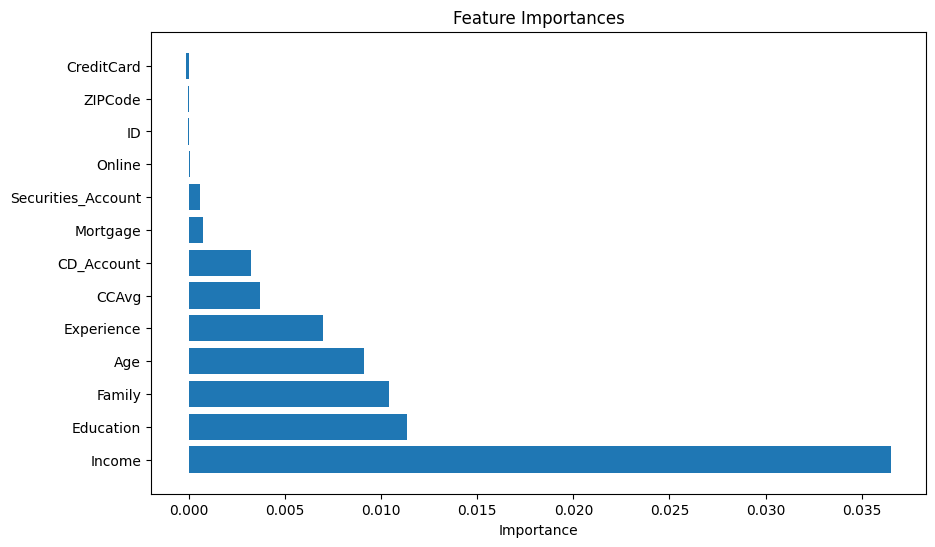

In [52]:

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
predictions = model.predict(x_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

# Display feature importances
feature_importances = pd.DataFrame({'Feature': x.columns, 'Importance': model.coef_[0]})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


- Income is the most important feuture. Therefore the higher earner are most likey to buy the loan product more than others.
- The next most important feuture is the Education level of the propsect.The weakest feutures are ID, Zipcode, Credit card and Online

- True Positive (TP): 34

- This is the number of instances where the model correctly predicted that a liability customer will buy a personal loan.
- False Positive (FP): 20

- This is the number of instances where the model incorrectly predicted that a liability customer will buy a personal loan when they actually did not.
- False Negative (FN): 71

- This is the number of instances where the model incorrectly predicted that a liability customer will not buy a personal loanwhen they actually did.
- True Negative (TN): 875

- This is the number of instances where the model correctly predicted that a liability customer will not buy a personal loan

#### Using Decision Tree Model on the Balanced Dataset

In [53]:


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=42)

# Train the model
dtree.fit(x_train, y_train)

# Make predictions on the test set
predictions = dtree.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


Accuracy: 0.985
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.94      0.91      0.93       105

    accuracy                           0.98      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.98      0.98      0.98      1000

Confusion Matrix:
 [[889   6]
 [  9  96]]


- The output provides the evaluation metrics for a classification model. Let's interpret each section:

- Accuracy: 98.5%

- The overall correctness of the model's predictions is 98.5%.
- Classification Report:

- Precision: Indicates the accuracy of the positive predictions.

- Precision for class 0 (No) is high (99%): Among the instances predicted as class 0, 99% were actually class 0.
- Precision for class 1 (Yes) is slightly lower (94%): Among the instances predicted as class 1, 94% were actually class 1.
- Recall (Sensitivity): Measures the ability of the model to capture all relevant instances.

- Recall for class 0 (No) is high (99%): Out of all instances that were actually class 0, 99% were correctly predicted.
- Recall for class 1 (Yes) is good (91%): Out of all instances that were actually class 1, 91% were correctly predicted.
- F1-Score: Balances precision and recall.

- F1-score for class 0 is high (99%).
- F1-score for class 1 is good (93%).
- Support: The number of actual occurrences of each class in the specified dataset.

- Confusion Matrix:

- True Positives (TP): 96 instances correctly predicted as class 1.
- True Negatives (TN): 889 instances correctly predicted as class 0.
- False Positives (FP): 6 instances incorrectly predicted as class 1.
- False Negatives (FN): 9 instances incorrectly predicted as class 0.

- Interpretation:
- The model performs well with high accuracy, particularly in correctly predicting instances of class 0. However, there is a slight imbalance, with lower precision and recall for class 1, indicating potential room for improvement, especially in capturing instances of class 1.






In [54]:
model_performance_classification_sklearn(dtree, x_train_sm, y_train_sm)

Accuracy: 0.9361567635903919
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      3164
           1       1.00      0.87      0.93      3164

    accuracy                           0.94      6328
   macro avg       0.94      0.94      0.94      6328
weighted avg       0.94      0.94      0.94      6328

Confusion Matrix:
 [[3160    4]
 [ 400 2764]]


{'accuracy': 0.9361567635903919,
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      1.00      0.94      3164\n           1       1.00      0.87      0.93      3164\n\n    accuracy                           0.94      6328\n   macro avg       0.94      0.94      0.94      6328\nweighted avg       0.94      0.94      0.94      6328\n',
 'confusion_matrix': array([[3160,    4],
        [ 400, 2764]], dtype=int64)}

- The output provides evaluation metrics for a classification model. Here's the interpretation:

- Accuracy: 93.62%

- The overall correctness of the model's predictions is 93.62%.
- Classification Report:

- Precision: Indicates the accuracy of the positive predictions.

- Precision for class 0 (No) is high (89%): Among the instances predicted as class 0, 89% were actually class 0.
- Precision for class 1 (Yes) is perfect (100%): Among the instances predicted as class 1, 100% were actually class 1.
- Recall (Sensitivity): Measures the ability of the model to capture all relevant instances.

- Recall for class 0 (No) is perfect (100%): Out of all instances that were actually class 0, 100% were correctly predicted.
- Recall for class 1 (Yes) is good (87%): Out of all instances that were actually class 1, 87% were correctly predicted.
- F1-Score: Balances precision and recall.

- F1-score for class 0 is high (94%).
- F1-score for class 1 is also high (93%).
- Support: The number of actual occurrences of each class in the specified dataset.

- Confusion Matrix:

- True Positives (TP): 2764 instances correctly predicted as class 1.
- True Negatives (TN): 3160 instances correctly predicted as class 0.
- False Positives (FP): 4 instances incorrectly predicted as class 1.
- False Negatives (FN): 400 instances incorrectly predicted as class 0.

- Interpretation:
- The model performs very well with high accuracy and precision for both classes. However, there is a slight imbalance in recall, with class 1 (Yes) having a lower recall compared to class 0 (No). This indicates that the model may have some difficulty in correctly identifying instances of class 1, potentially leading to missed opportunities for positive predictions.

In [55]:
model_performance_classification_sklearn(dtree, x_test_sm, y_test_sm)

Accuracy: 0.93547197640118
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1356
           1       1.00      0.87      0.93      1356

    accuracy                           0.94      2712
   macro avg       0.94      0.94      0.94      2712
weighted avg       0.94      0.94      0.94      2712

Confusion Matrix:
 [[1354    2]
 [ 173 1183]]


{'accuracy': 0.93547197640118,
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      1.00      0.94      1356\n           1       1.00      0.87      0.93      1356\n\n    accuracy                           0.94      2712\n   macro avg       0.94      0.94      0.94      2712\nweighted avg       0.94      0.94      0.94      2712\n',
 'confusion_matrix': array([[1354,    2],
        [ 173, 1183]], dtype=int64)}

- The output provides evaluation metrics for a classification model. Here's the interpretation:

- Accuracy: 93.55%

- The overall correctness of the model's predictions is 93.55%.
- Classification Report:

- Precision: Indicates the accuracy of the positive predictions.

- Precision for class 0 (No) is high (89%): Among the instances predicted as class 0, 89% were actually class 0.
- Precision for class 1 (Yes) is perfect (100%): Among the instances predicted as class 1, 100% were actually class 1.
- Recall (Sensitivity): Measures the ability of the model to capture all relevant instances.

- Recall for class 0 (No) is perfect (100%): Out of all instances that were actually class 0, 100% were correctly predicted.
- Recall for class 1 (Yes) is good (87%): Out of all instances that were actually class 1, 87% were correctly predicted.
- F1-Score: Balances precision and recall.

- F1-score for class 0 is high (94%).
- F1-score for class 1 is also high (93%).
- Support: The number of actual occurrences of each class in the specified dataset.

- Confusion Matrix:
- True Positives (TP): 1183 instances correctly predicted as class 1.
- True Negatives (TN): 1354 instances correctly predicted as class 0.
- False Positives (FP): 2 instances incorrectly predicted as class 1.
- False Negatives (FN): 173 instances incorrectly predicted as class 0.

- Interpretation:
- The model performs very well with high accuracy and precision for both classes. Similar to the previous case, there is a slight imbalance in recall, with class 1 (Yes) having a lower recall compared to class 0 (No). This indicates that the model may have some difficulty in correctly identifying instances of class 1, potentially leading to missed opportunities for positive predictions.




